In [17]:
import xarray as xr
import numpy as np

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm
import geopandas as gpd
import cartopy.feature as cfeature
# import settings
# import fiona
import pandas as pd
from shapely.geometry import Polygon 

In [3]:
filedir = "/storage/shared/oceanparcels/output_data/data_Darshika/SeaClearlyStuff/"

In [5]:
top_lat, bottom_lat = 46, 30
left_lon, right_lon = -7, 37

In [6]:
gdb_file = filedir + "EMODnet_HA_Environment_Natura2000_end2020_20210909/EMODnet_HA_Environment_Natura2000_end2020_20210909.gdb" #EMODnet_HA_Environment_Natura2000_end2020_20210909/

full_data = gpd.read_file(gdb_file, bbox=(left_lon, bottom_lat, right_lon, top_lat))
data = full_data[full_data.COAST_MAR == 1]
shapes = data.geometry

In [45]:
data.SITENAME

31                                     Strandzha
42       Is-Simar (limiti ta' San Pawl il-Baħar)
44                    L-Inħawi ta' Għajn Barrani
45           L-Inħawi tal-Buskett u tal-Girgenti
46          Wied il-Mielaħ u l-Inħawi tal-Madwar
                          ...                   
6952    Islas e Islotes del Litoral Mediterráneo
6957              Cova des Drac de cala Santanyí
6963                                Cuatro Calas
6964                       Sierra de las Moreras
6965                                    Calnegre
Name: SITENAME, Length: 1892, dtype: object

In [51]:
Calnegre = data[data.SITENAME == 'Calnegre'].geometry

In [53]:
Polygon(Calnegre).exterior.coords.xy

KeyError: 0

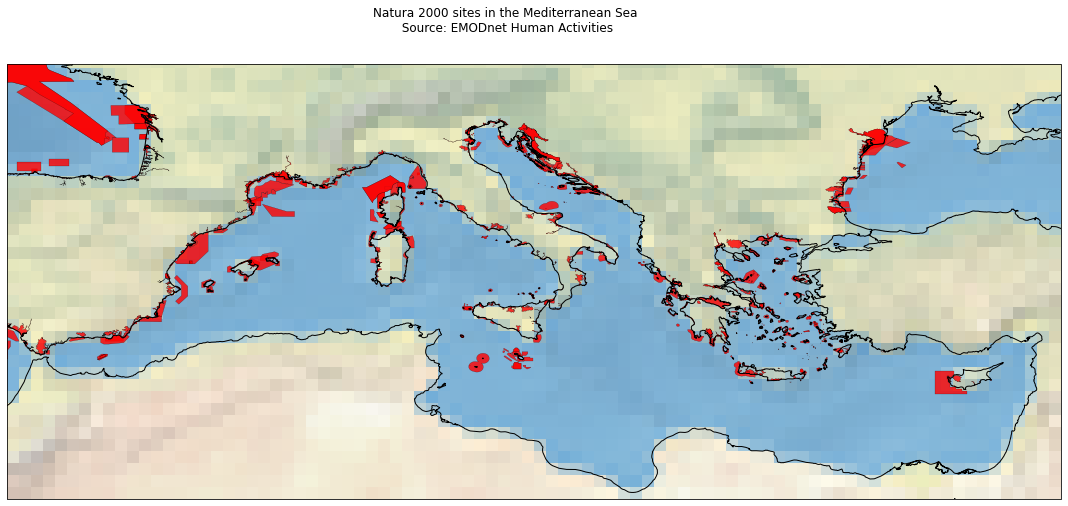

In [18]:
fig = plt.figure(figsize=(32,8))
Map_BOUNDS = [-7, 37, 46, 30]
plt.suptitle(
    "Natura 2000 sites in the Mediterranean Sea\n Source: EMODnet Human Activities")
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.stock_img()
ax.set_extent(Map_BOUNDS)


def plot_mpa(shape):
    for geom in shape.geoms:
        xs, ys = Polygon(geom).exterior.coords.xy
        ax.fill(xs, ys, c="red", alpha=0.8, edgecolor='k', linewidth=0.2)


[plot_mpa(s) for s in shapes]

plt.show()

In [66]:
def mpa_xy(shape):
    for geom in shape.geoms:
        xs, ys = Polygon(geom).exterior.coords.xy
        return xs, ys

In [54]:
mpas = [s for s in shapes]

In [68]:
xx, yy = mpa_xy(mpas[0])

In [74]:
xx[0]

27.375038545000052

In [78]:
yy

array('d', [42.203695528000026, 42.20367644800007, 42.203675788000055, 42.203700825000055, 42.203732348000074, 42.203752103000056, 42.20377233100004, 42.20381732000004, 42.20385179600004, 42.20389330200004, 42.20391878200007, 42.20396170600003, 42.20396339200005, 42.203976846000046, 42.20398215200004, 42.203982076000045, 42.20397537600007, 42.20392471400004, 42.20386399300003, 42.20380632100006, 42.20376184400004, 42.20370552000003, 42.20364258600006, 42.203554567000026, 42.20346834800006, 42.20336566700007, 42.20324315000005, 42.20314428900008, 42.20304303900008, 42.20290947400008, 42.20280645500003, 42.20268383100006, 42.20259382900008, 42.202488421000055, 42.202379345000054, 42.202268117000074, 42.20215512000004, 42.202056060000075, 42.20196817200008, 42.20189162600008, 42.20178025400003, 42.20164406200007, 42.20151687600003, 42.201392233000036, 42.201199098000075, 42.201120752000065, 42.20101140000003, 42.20089037400004, 42.20080119800008, 42.200724894000075, 42.20072121100003, 42.